In [87]:
import pandas as pd

#upload data
data = pd.read_csv('seattle-weather.csv')

# shows the data
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [88]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [89]:
unique_weather_conditions = data['weather'].unique()
print(unique_weather_conditions)

['drizzle' 'rain' 'sun' 'snow' 'fog']


In [90]:
data['weather'] = data['weather'].replace({'drizzle': 1, 'rain': 1, 'sun': 0, 'snow': 0, 'fog': 0})

In [91]:
corr_data = data.corr()
print(corr_data)

               precipitation  temp_max  temp_min      wind   weather
precipitation       1.000000 -0.228555 -0.072684  0.328045  0.431265
temp_max           -0.228555  1.000000  0.875687 -0.164857 -0.361951
temp_min           -0.072684  0.875687  1.000000 -0.074185 -0.129285
wind                0.328045 -0.164857 -0.074185  1.000000  0.217946
weather             0.431265 -0.361951 -0.129285  0.217946  1.000000


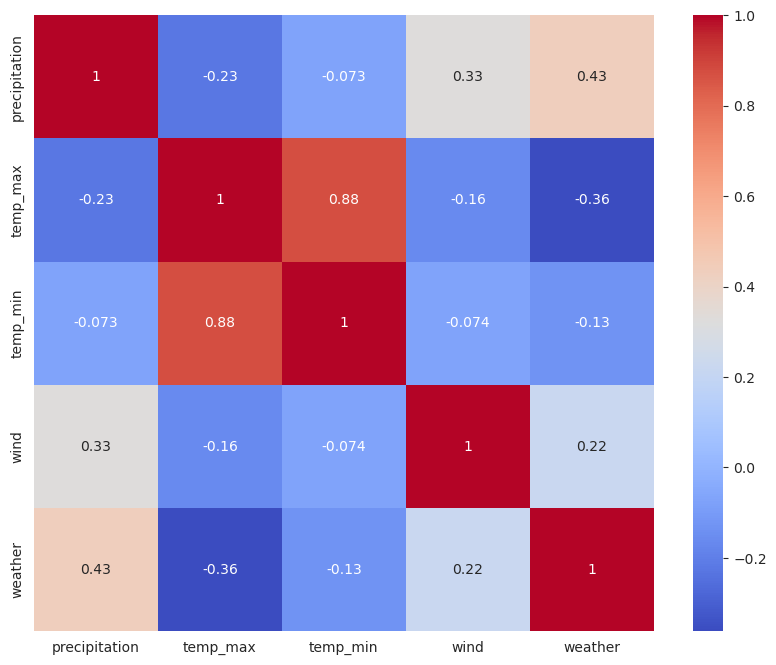

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

sns.heatmap(corr_data, annot=True, cmap='coolwarm')

plt.show()

In [93]:
data_new = data.drop(['temp_max','date', 'temp_min'], axis=1) 

In [94]:
print(data_new.columns)

Index(['precipitation', 'wind', 'weather'], dtype='object')


In [95]:

# show the rows for the new kolumn
print(data_new.head())

   precipitation  wind  weather
0            0.0   4.7        1
1           10.9   4.5        1
2            0.8   2.3        1
3           20.3   4.7        1
4            1.3   6.1        1


In [96]:
from sklearn.model_selection import train_test_split

# temp_max, temp_min och wind features
X = data_new.drop(['weather'], axis=1 )  # Features
y = data_new['weather']  # Target variable

# Divide data in training and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.linear_model import LogisticRegression

# Creats instans LogisticRegression 
model = LogisticRegression()

# Train model with training data
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
from sklearn.metrics import accuracy_score

# Prediction testsetet
y_pred = model.predict(X_test)

# Calc the models accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.8327645051194539


In [99]:
from sklearn.tree import DecisionTreeClassifier

# Creats instans DecisionTree
model = DecisionTreeClassifier()

# Train model with training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [100]:
from sklearn.metrics import accuracy_score

# Prediction testsetet
y_pred = model.predict(X_test)

# calc the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with Decision Tree: {accuracy}")

Model accuracy with Decision Tree: 0.89419795221843
